In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('50_Startups.csv')

In [46]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
df.columns.str.lower().str.replace(' ','_')

Index(['r&d_spend', 'administration', 'marketing_spend', 'state', 'profit'], dtype='object')

In [50]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,new_york,192261.83
1,162597.70,151377.59,443898.53,california,191792.06
2,153441.51,101145.55,407934.54,florida,191050.39
3,144372.41,118671.85,383199.62,new_york,182901.99
4,142107.34,91391.77,366168.42,florida,166187.94


In [48]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [49]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,new_york,192261.83
1,162597.70,151377.59,443898.53,california,191792.06
2,153441.51,101145.55,407934.54,florida,191050.39
3,144372.41,118671.85,383199.62,new_york,182901.99
4,142107.34,91391.77,366168.42,florida,166187.94


In [12]:
df.isnull().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
df.nunique()


R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [15]:
df.shape

(50, 5)

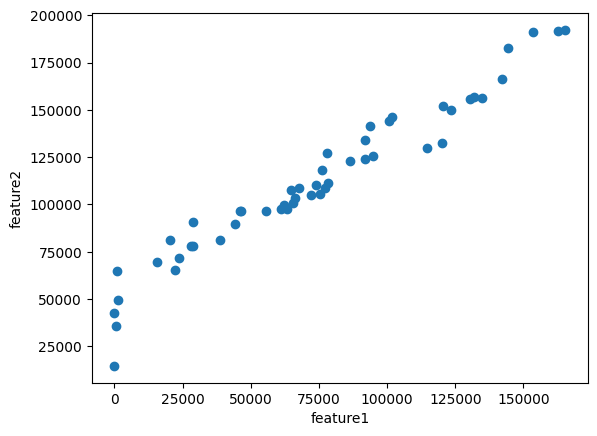

In [52]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()


In [53]:
from scipy import stats

df['z_score'] = stats.zscore(df['Profit'])
outliers = df[df['z_score'].abs() > 3]


In [54]:
outliers

,R&D Spend,Administration,Marketing Spend,State,Profit,z_score


In [55]:

X = df.iloc[ : , :-1].values
Y = df.iloc[ : ,  4 ].values

In [56]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
X[:,3] = model.fit_transform(X[:,3])
print(X[:,3])

[2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 2 1 2 0 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1
 0 2 0 0 1 0 2 0 2 1 0 2 0]


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to apply OneHotEncoder to the 4th column (index 3)
ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1 192261.83]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53 191792.06]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54 191050.39]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62 182901.99]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42 166187.94]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36 156991.12]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82 156122.51]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68 155752.6]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29 152211.77]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62 149759.96]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95 146121.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55 144259.4]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44 141585.52]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93 134307.35]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92 132602.65]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23 129917.04]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06 126992.93]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31 125370.37]
 [0.0 1.0 0.0 91749.16 1

In [58]:
X = X[: , 1:]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(X_test)

In [62]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mean_absolute_error(Y_test, y_pred)
mean_squared_error(Y_test, y_pred)
r2_score(Y_test, y_pred)
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
print('R-squared:', r2_score(Y_test, y_pred))

Mean Absolute Error: 1.746229827404022e-11
Mean Squared Error: 4.658681209898652e-22
R-squared: 1.0


In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X, Y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE:", -scores.mean())


Cross-Validation MAE: 2.863089321181178e-11
